Zmienne:
 - PODM - liczba podmiotów gospodarczych w przeliczeniu na 1000 mieszkańców, - nominanta
 - BEZR - udział liczby bezrobotnych w liczbie osób w wieku produkcyjnym (%), - destymulanta
 - MIESZ - powierzchnia użytkowa mieszkań oddanych do użytkowania na 1000 ludności (w m^2), - nominanta
 - ZAL - gęstość zaludnienia (os./km2), - nominanta
 - PRZES - wskaźnik wykrywalności sprawców przestępstw kryminalnych (%) - stymulanta
 - EMI - emisja zanieczyszczeń pyłkowych na 10 km^2 - destymulanta
 - ZIEL - udział powierzchni terenów zieleni w powierzchni ogółem (%), - nominanta
 - NAKL - nakłady inwestycyjne na jednego mieszkańca (zł), - nominanta
 - WYN - przeciętne miesięczne wynagrodzenia brutto (zł). - stymulanta
j - kolumna
i - wiersz

Plik "powiaty" (dane dotyczące powiatów małopolski, bez miast na prawach powiatu, w 2023 roku):
 - NOCL - liczba miejsc noclegowych w przeliczeniu na 1000 ludności,
 - ROW - długość dróg dla rowerów (km),
 - PARK - powierzchnia parków spacerowo - wypoczynkowych (ha),
 - LAS - powierzchnia gruntów leśnych (ha),
 - KUL - ludność przypadająca na jedną instytucję kultury - centrum, dom, ośrodek kultury, klub i świetlicę
 - IMPR - liczba masowych imprez artystyczno-rozrywkowych w przeliczeniu na 100 000 ludności,
 - MUZE - liczba muzeów łącznie z oddziałami,
 - EMIS - emisja zanieczyszczeń pyłkowych (t/r),
 - PRZES - liczba przestępstw stwierdzonych przez policję w zakończonych postępowaniach przygotowawczych.

             NOCL         ROW        PARK           LAS           KUL  \
count   19.000000   19.000000   19.000000     19.000000     19.000000   
mean    34.155789   41.984211   48.127368  10505.802105   8851.421053   
std     88.572448   32.686750   82.788207  10726.549363   4547.067093   
min      2.000000    4.800000    6.200000    222.050000   2325.000000   
25%      4.715000   18.050000   10.035000   2272.725000   5387.500000   
50%      9.790000   36.300000   22.800000   7716.480000   8146.000000   
75%     16.845000   56.350000   49.120000  17238.245000  11295.000000   
max    394.510000  120.100000  370.870000  39014.330000  17785.000000   

            IMPR       MUZE        EMIS        PRZES  
count  19.000000  19.000000   19.000000    19.000000  
mean    4.473684   2.894737   24.263158  2104.578947  
std     2.294157   2.306867   31.762735  1477.530045  
min     0.000000   0.000000    2.000000   262.000000  
25%     3.000000   1.000000    5.000000  1275.000000  
50%     4.00

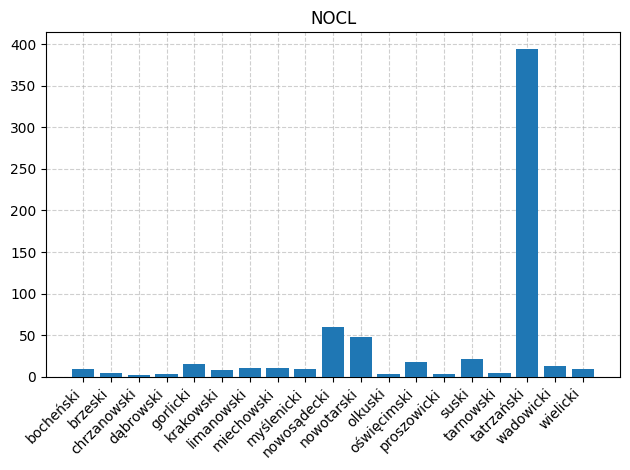

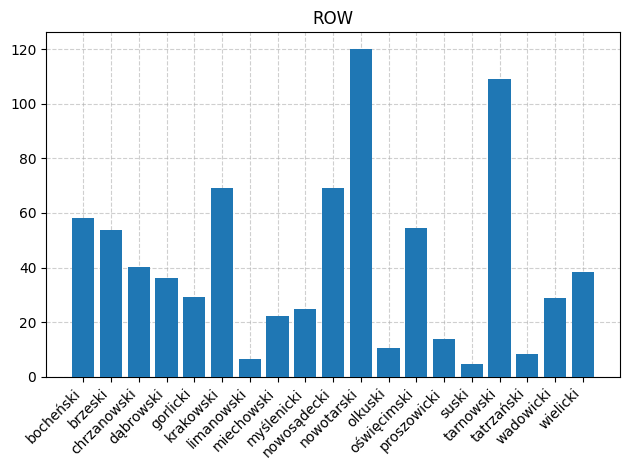

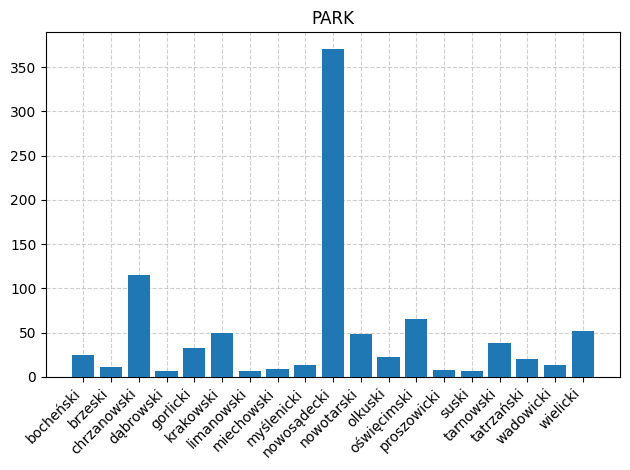

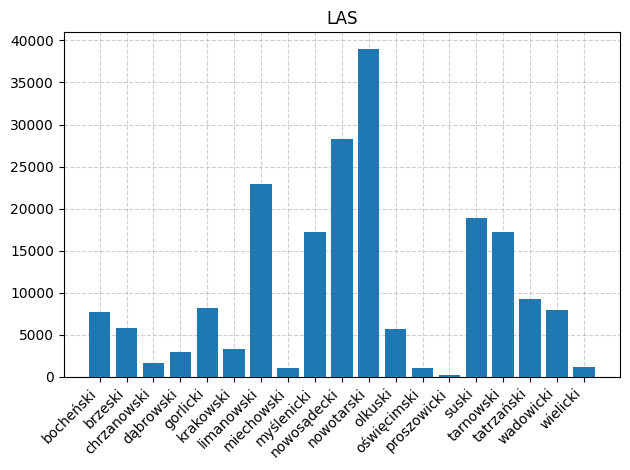

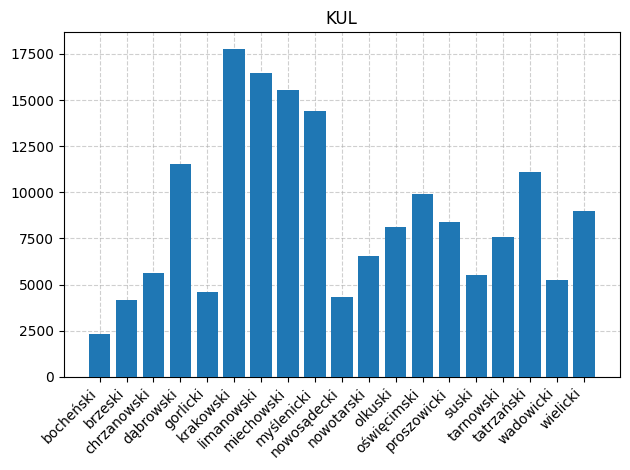

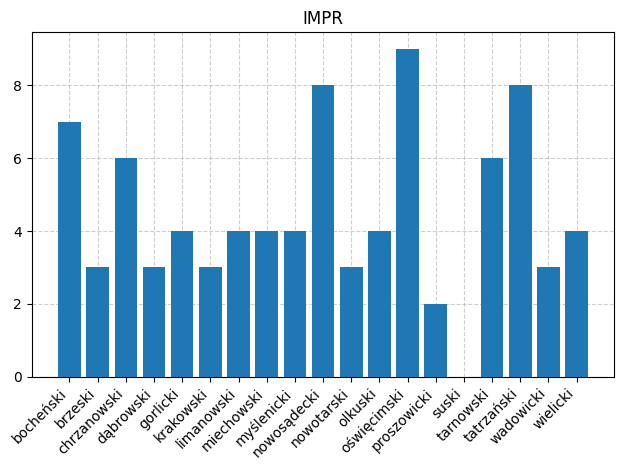

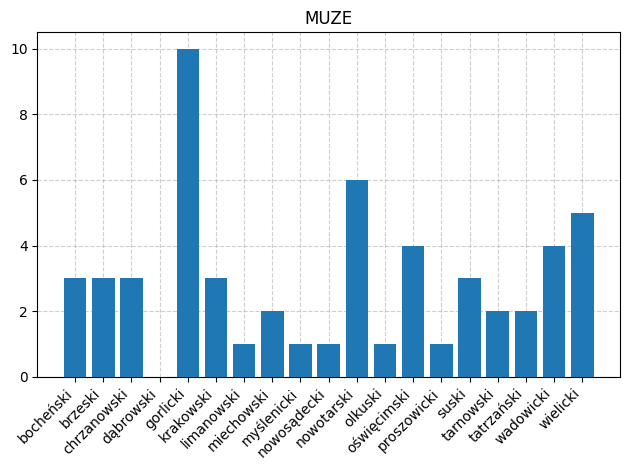

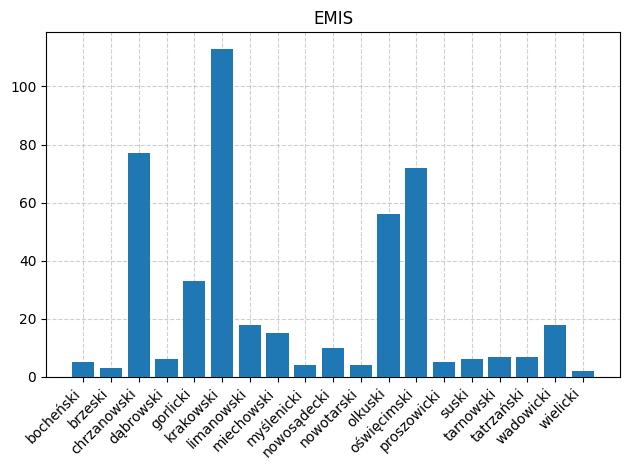

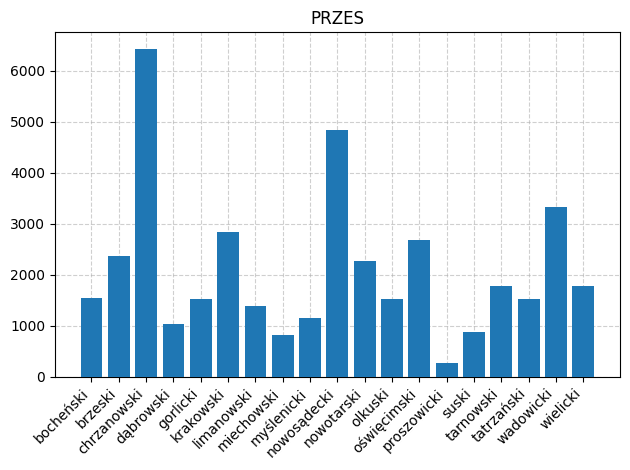

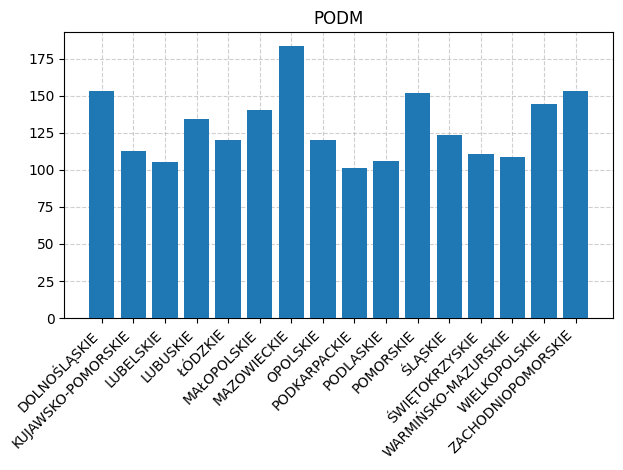

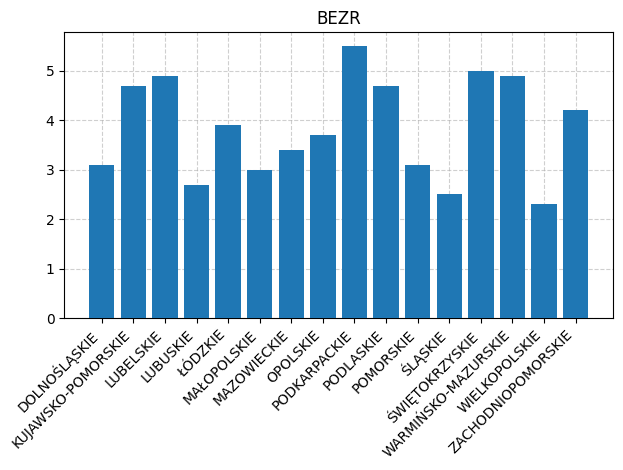

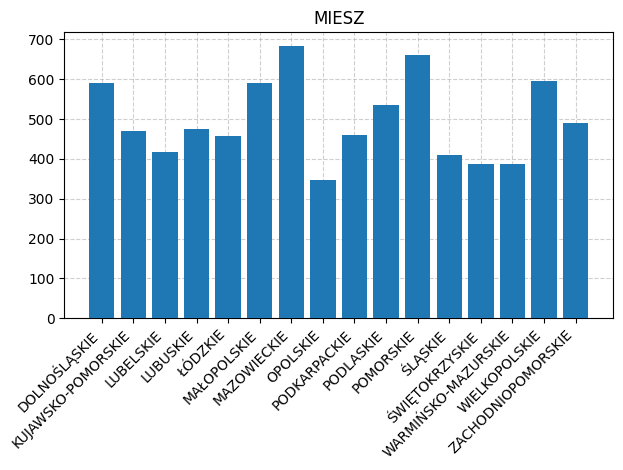

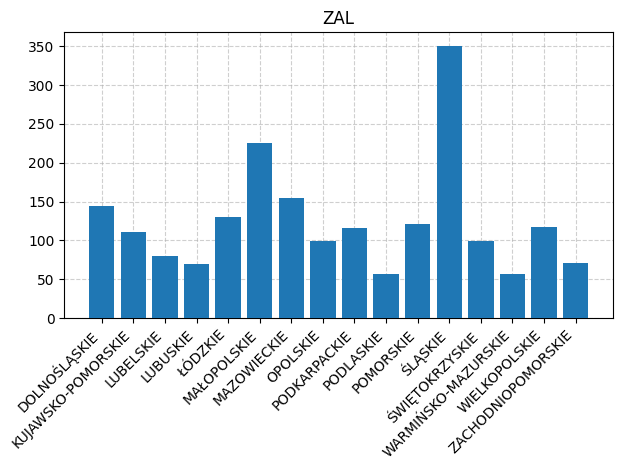

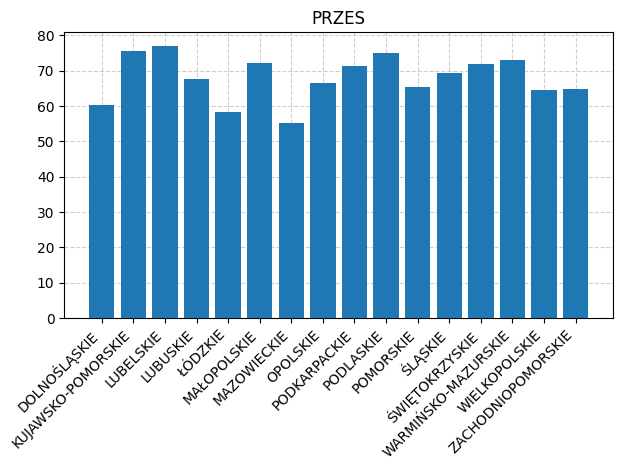

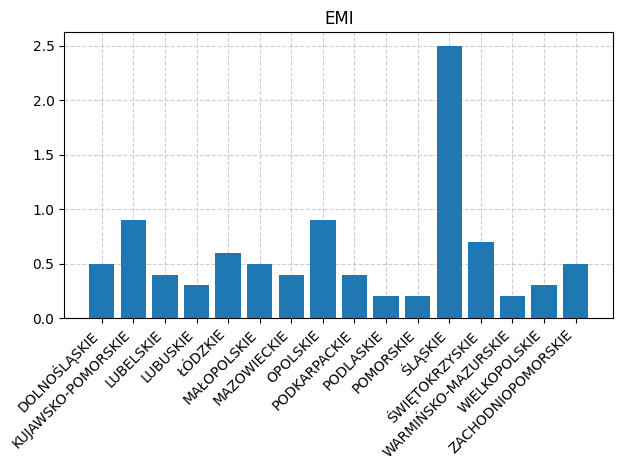

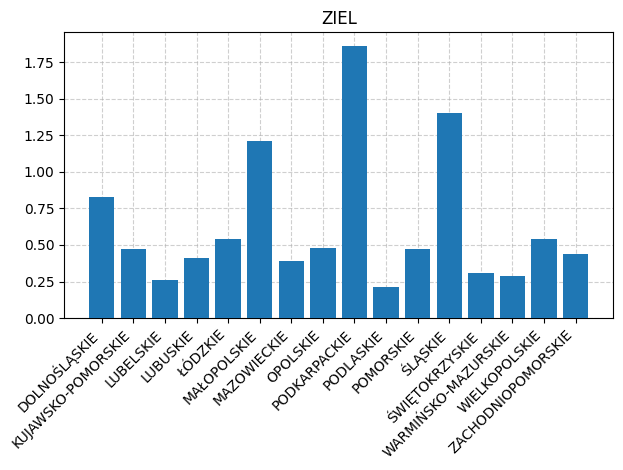

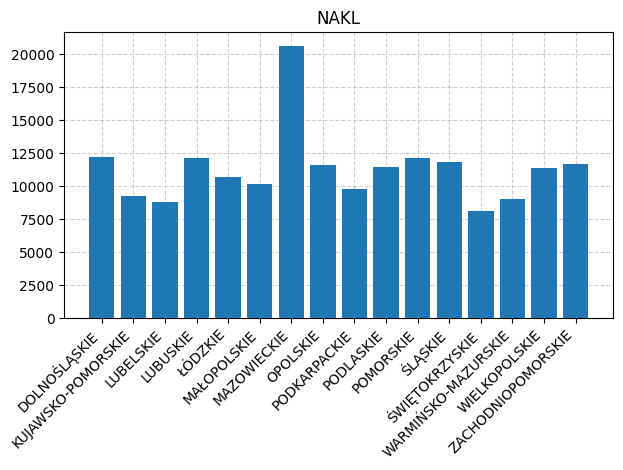

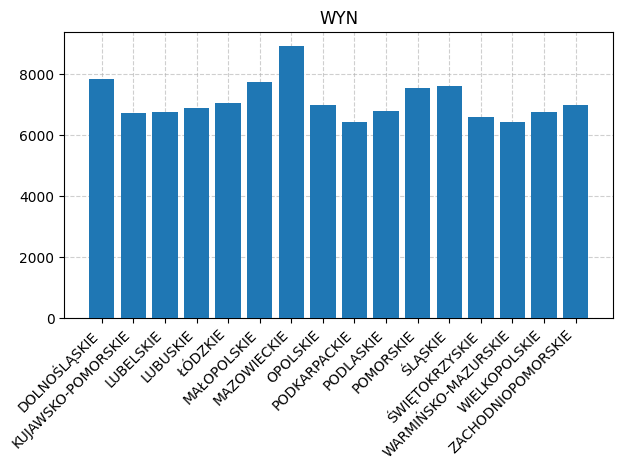

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


powiaty = pd.read_excel("DanePowiaty2023.xlsx")
powiaty["Powiat"] = powiaty["Powiat"].str.replace("Powiat ", "")

wojewodztwa = pd.read_excel("DaneWojewodztwa2023.xlsx")
print(powiaty.describe())
print(wojewodztwa.describe())

X = powiaty["Powiat"]

for col in powiaty.columns:
    if col == "Powiat":
        continue

    Y = powiaty[col]

    fig, ax = plt.subplots()
    ax.bar(X, Y, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()

X = wojewodztwa["wojewodztwo"]
for col in wojewodztwa.columns:
    if col == "wojewodztwo":
        continue

    Y = wojewodztwa[col]

    fig, ax = plt.subplots()
    ax.bar(X, Y, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()








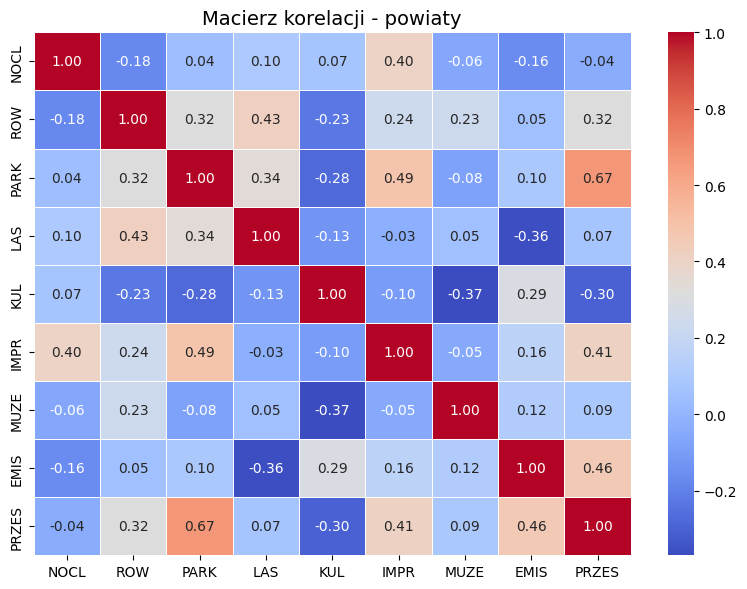

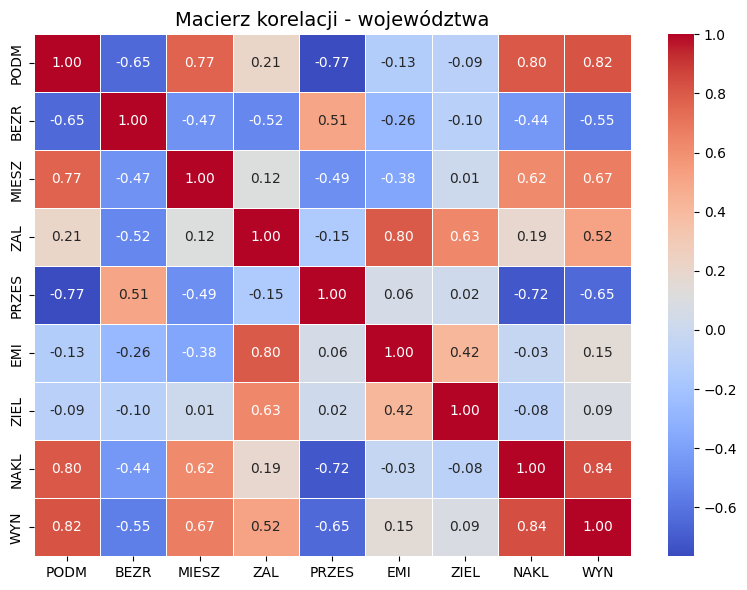

In [10]:

corr = powiaty.drop(columns=["Powiat"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Macierz korelacji - powiaty", fontsize=14)
plt.tight_layout()
plt.show()
corr2 = wojewodztwa.drop(columns=["wojewodztwo"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Macierz korelacji - województwa", fontsize=14)
plt.tight_layout()
plt.show()


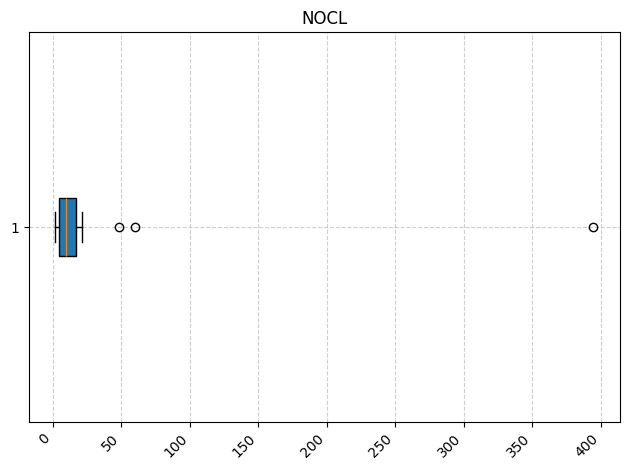

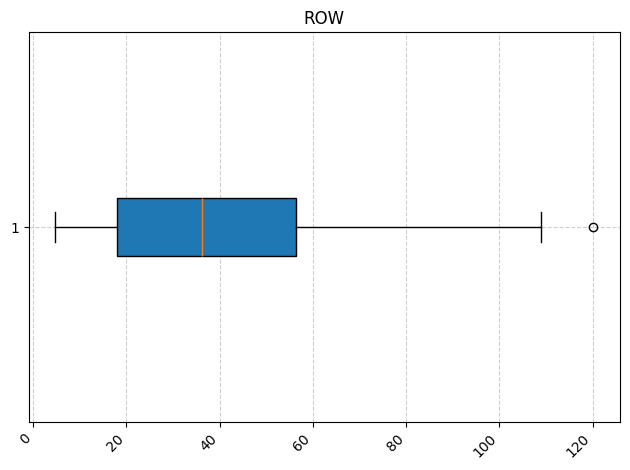

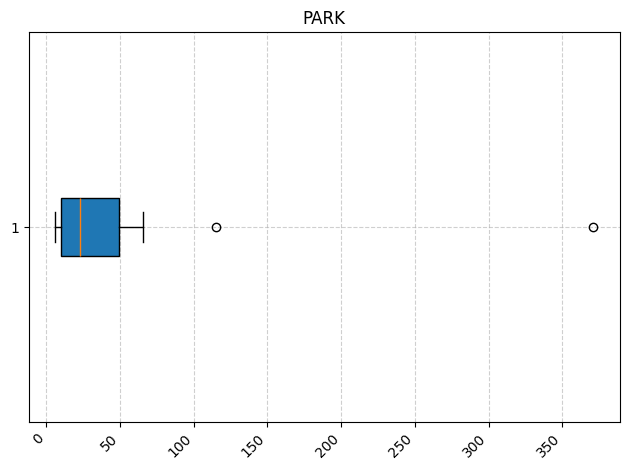

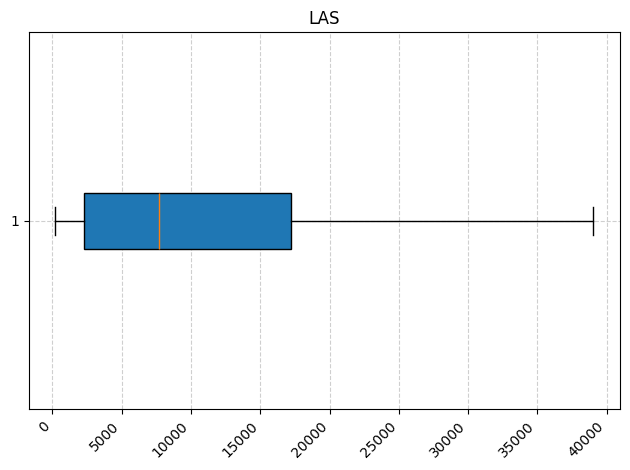

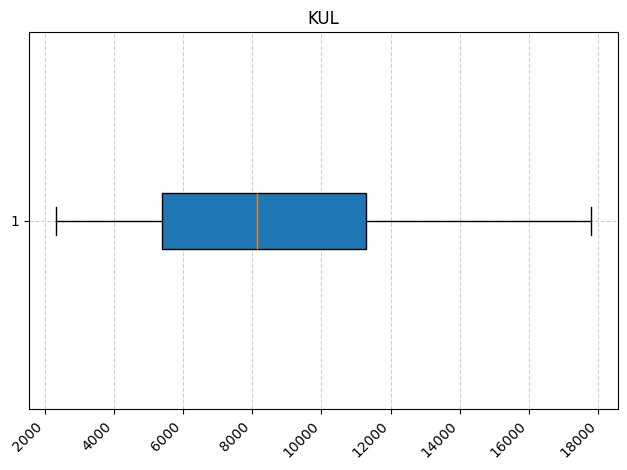

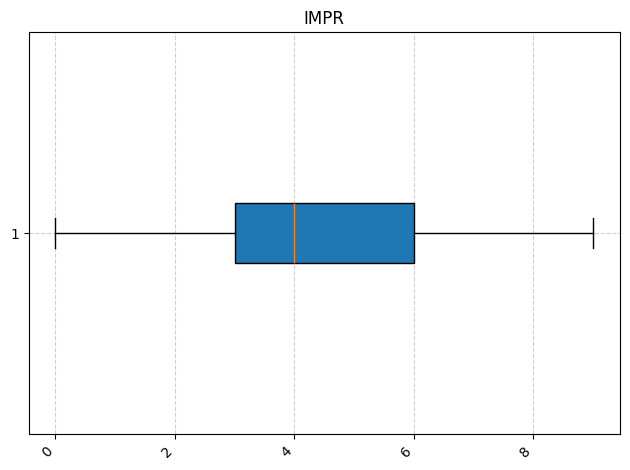

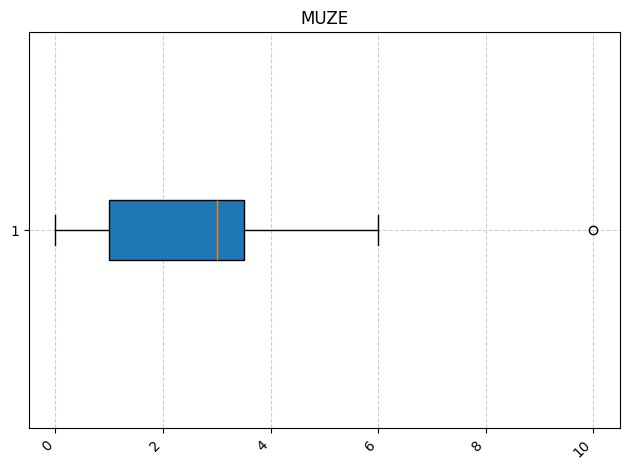

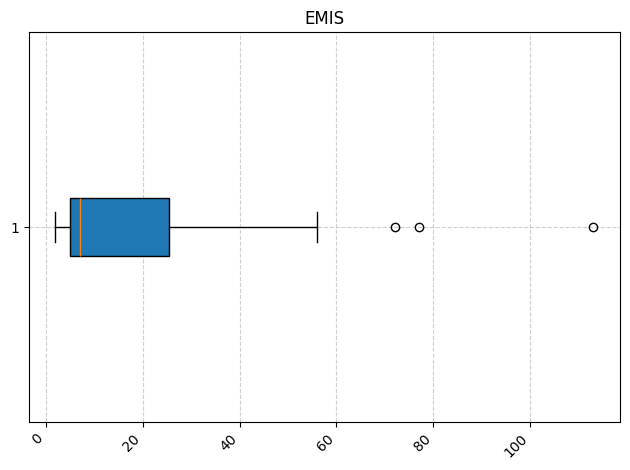

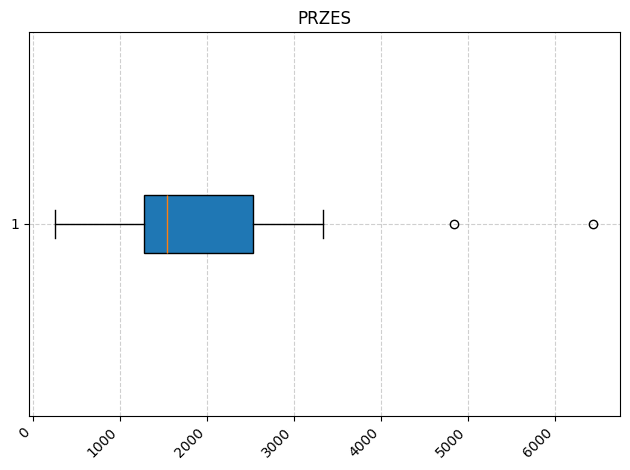

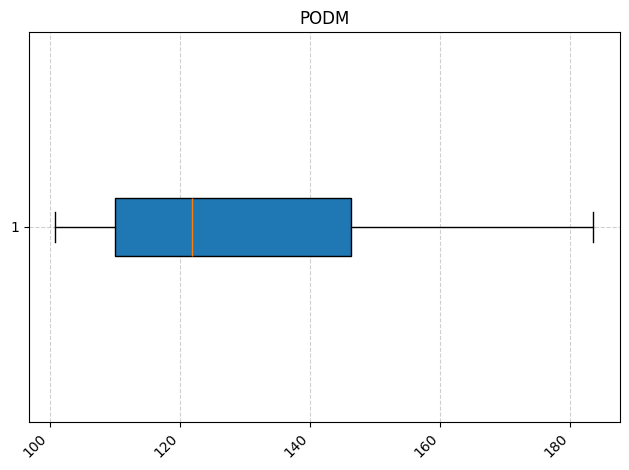

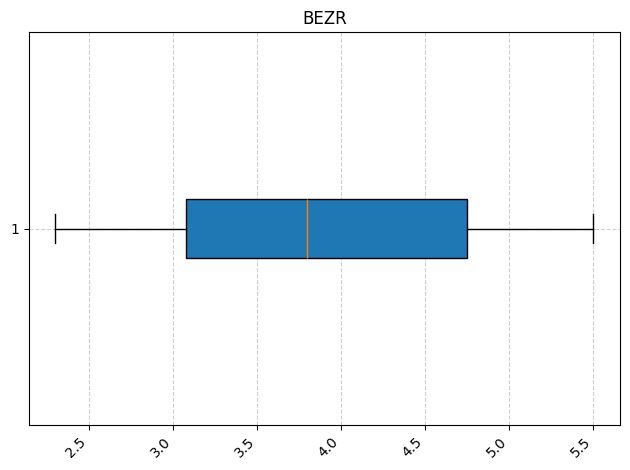

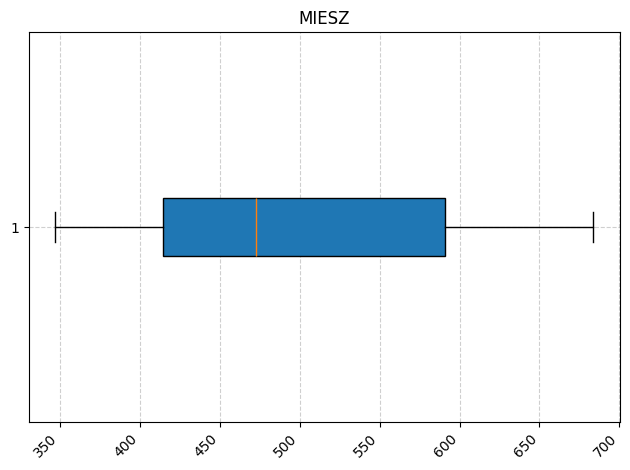

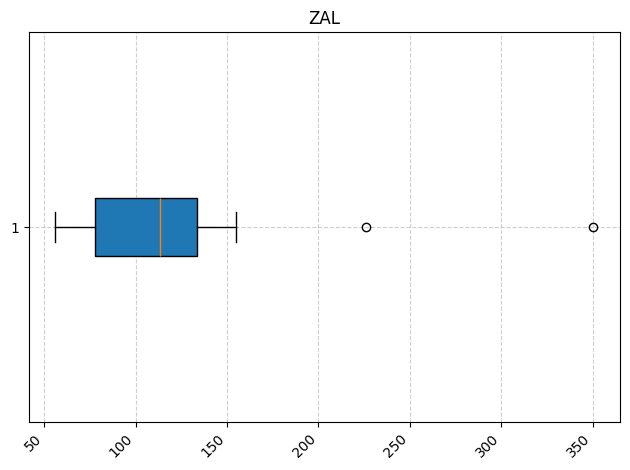

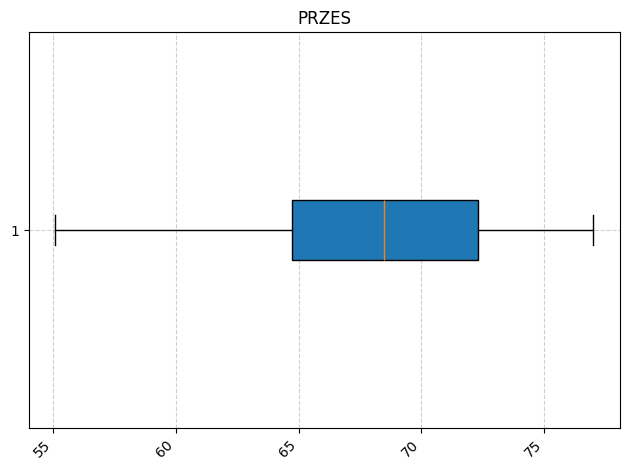

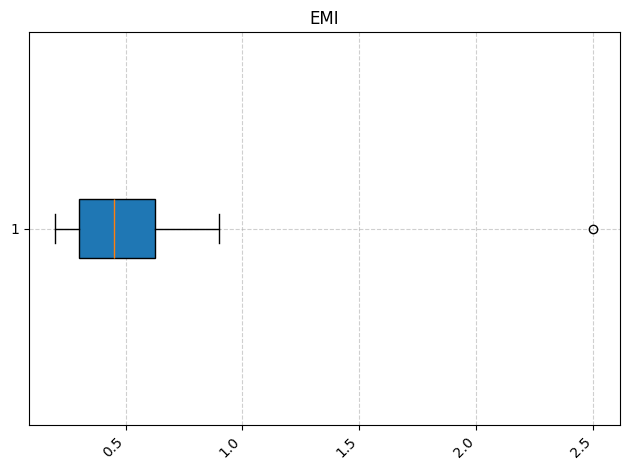

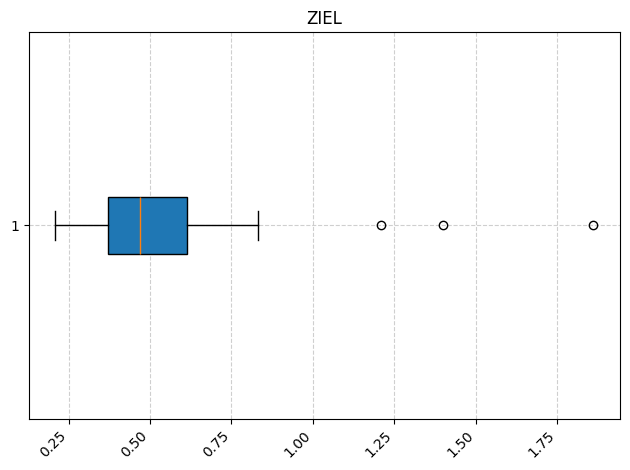

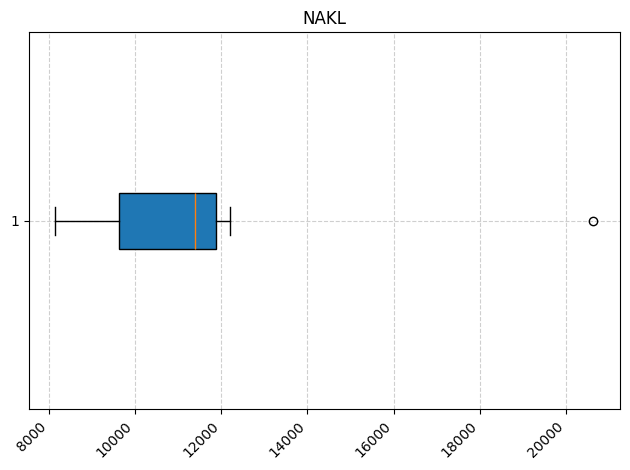

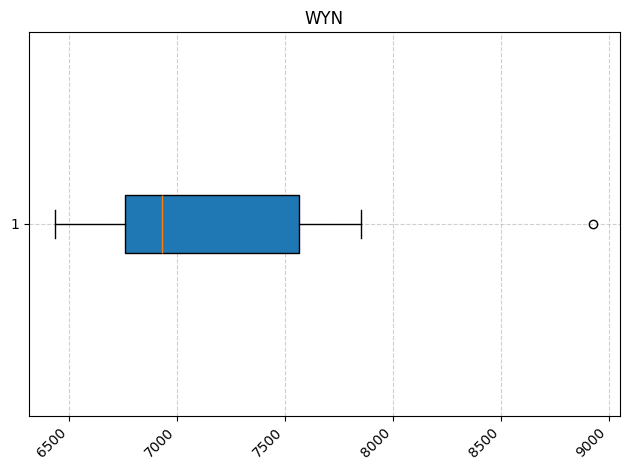

In [11]:
X = powiaty["Powiat"]

for col in powiaty.columns:
    if col == "Powiat":
        continue

    Y = powiaty[col]

    fig, ax = plt.subplots()
    ax.boxplot(Y, vert=False, patch_artist=True)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()

X = wojewodztwa["wojewodztwo"]

for col in wojewodztwa.columns:
    if col == "wojewodztwo":
        continue

    Y = wojewodztwa[col]

    fig, ax = plt.subplots()
    ax.boxplot(Y, vert=False, patch_artist=True)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()





In [12]:
def zamiana_destymulanty(df, nominanty, destymulanty):
    for col in df.columns:
        if col in nominanty:
            opt = optimum[nominanty.index(col)]
            for row in range(len(df)):
                val = df.loc[row, col]
                if val == opt:
                    df.loc[row, col] = 1
                elif val > opt:
                    df.loc[row, col] = 1 / (val - opt + 1)
                else:
                    df.loc[row, col] = -1 / (val - opt - 1)
        if col in destymulanty:
            df[col] = -df[col]
    return df

def standaryzacja(df):
    for col in df.select_dtypes(include="number").columns:
        mean = df[col].mean()
        stdev = df[col].std()
        df[col] = (df[col] - mean) / stdev
    return df

def stworz_wykres(arguments, values, label, rodzaj, legenda, title):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(arguments, values, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(f"{title} dla {rodzaj}")
    plt.xticks(arguments, label, rotation=45, ha='right')
    ax.set_ylabel(legenda)
    fig.tight_layout()
    plt.show()

In [13]:
stymulanty_woj = ["PODM","PRZES", "ZIEL", "WYN", "NAKL"]
nominanty_woj = ["MIESZ", "ZAL"]
destymulanty_woj = ["BEZR", "EMI"]
optimum = [500, 150]
wojewodztwa_stand = wojewodztwa.copy()


wojewodztwa_stand = zamiana_destymulanty(wojewodztwa_stand, nominanty_woj, destymulanty_woj)
wojewodztwa_stand = standaryzacja(wojewodztwa_stand)



=== RANKING - METODA STANDARYZACJI (więcej = lepiej)===
            wojewodztwo  syntetyczna_standaryzowana
0           MAZOWIECKIE                    1.000000
1          DOLNOŚLĄSKIE                    0.696187
2           MAŁOPOLSKIE                    0.588477
3    ZACHODNIOPOMORSKIE                    0.562388
4             POMORSKIE                    0.505045
5              LUBUSKIE                    0.491608
6         WIELKOPOLSKIE                    0.432526
7               ŚLĄSKIE                    0.321085
8          PODKARPACKIE                    0.308264
9             PODLASKIE                    0.263152
10   KUJAWSKO-POMORSKIE                    0.215009
11              ŁÓDZKIE                    0.212792
12             OPOLSKIE                    0.188350
13            LUBELSKIE                    0.123767
14  WARMIŃSKO-MAZURSKIE                    0.069347
15       ŚWIĘTOKRZYSKIE                    0.000000


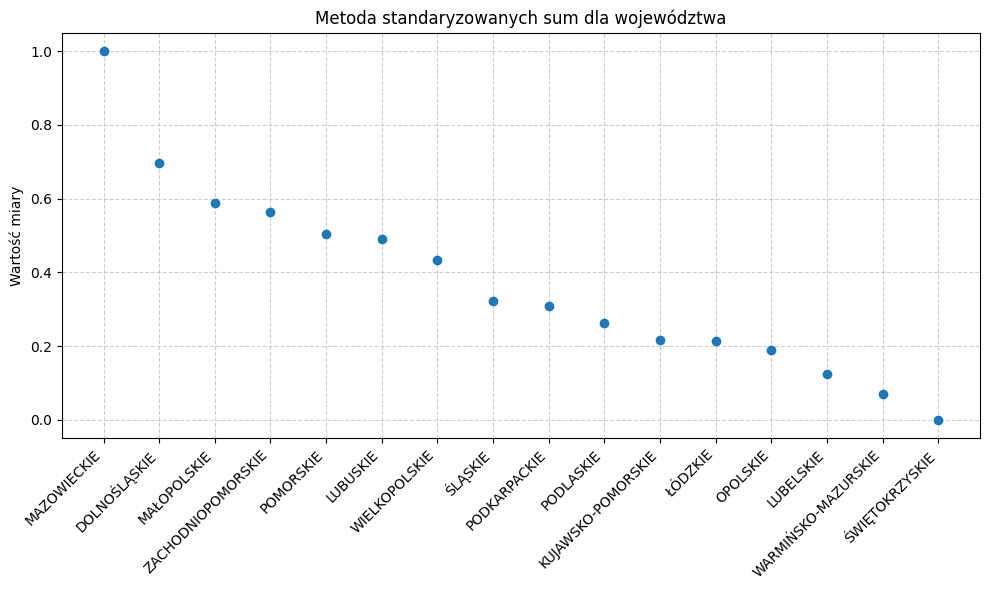

In [14]:
wojewodztwa_stand["syntetyczna"] = wojewodztwa_stand.select_dtypes(include="number").mean(axis=1)

# Standaryzacja syntetycznej
syntetyczna = wojewodztwa_stand["syntetyczna"]
min_s = syntetyczna.min()
max_s = syntetyczna.max()
wojewodztwa_stand["syntetyczna_standaryzowana"] = (syntetyczna - min_s) / (max_s - min_s)

posortowane_stand = wojewodztwa_stand[["wojewodztwo", "syntetyczna_standaryzowana"]].sort_values(
    by="syntetyczna_standaryzowana", ascending=False).reset_index(drop=True)

print("\n=== RANKING - METODA STANDARYZACJI (więcej = lepiej)===")
print(posortowane_stand)


X = range(len(posortowane_stand))
Y = posortowane_stand["syntetyczna_standaryzowana"].values
labels = posortowane_stand["wojewodztwo"]

stworz_wykres(X, Y, labels, "województwa", "Wartość miary", "Metoda standaryzowanych sum")




=== RANKING - METODA RANG ===
            wojewodztwo  syntetyczna_rangi_srednia
0          DOLNOŚLĄSKIE                   5.555556
1             POMORSKIE                   6.222222
2           MAZOWIECKIE                   6.777778
3           MAŁOPOLSKIE                   6.777778
4              LUBUSKIE                   6.888889
5         WIELKOPOLSKIE                   7.222222
6               ŚLĄSKIE                   7.666667
7    ZACHODNIOPOMORSKIE                   7.666667
8               ŁÓDZKIE                   8.444444
9             PODLASKIE                   9.000000
10   KUJAWSKO-POMORSKIE                   9.111111
11         PODKARPACKIE                   9.444444
12             OPOLSKIE                   9.555556
13            LUBELSKIE                  10.333333
14  WARMIŃSKO-MAZURSKIE                  11.333333
15       ŚWIĘTOKRZYSKIE                  12.111111


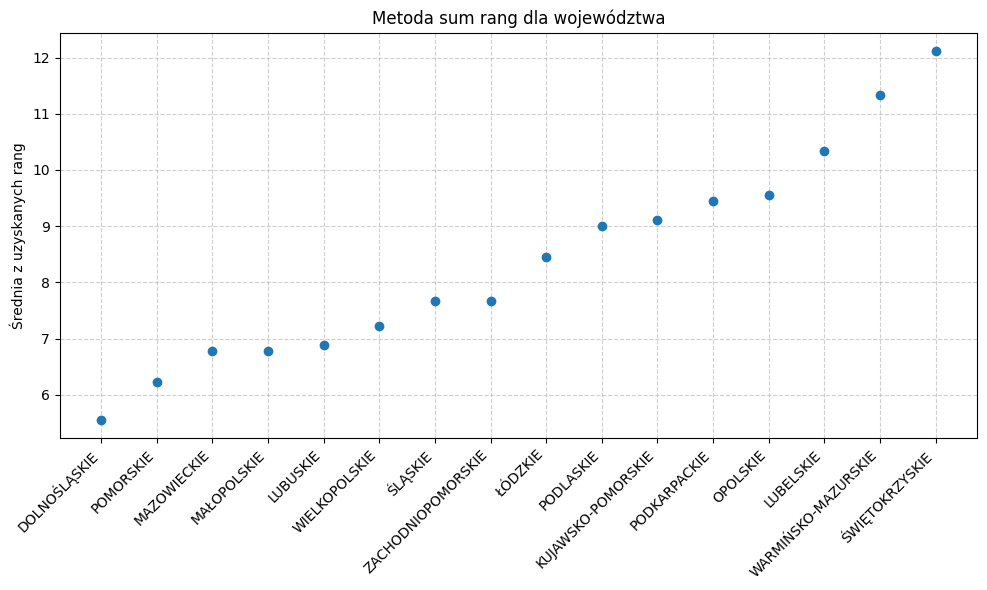

In [15]:
wojewodztwa_rang = wojewodztwa.copy()
wojewodztwa_rang = zamiana_destymulanty(wojewodztwa_rang, nominanty_woj, destymulanty_woj)


rangi_cols = []
for col in wojewodztwa_rang.select_dtypes(include="number").columns:
    rang_col = f"{col}_rang"
    wojewodztwa_rang[rang_col] = wojewodztwa_rang[col].rank(ascending=False, method='min')
    rangi_cols.append(rang_col)

wojewodztwa_rang["syntetyczna_rangi_srednia"] = wojewodztwa_rang[rangi_cols].mean(axis=1)

posortowane_rang = wojewodztwa_rang[["wojewodztwo", "syntetyczna_rangi_srednia"]].sort_values(
    by="syntetyczna_rangi_srednia", ascending=True).reset_index(drop=True)

print("\n=== RANKING - METODA RANG ===")
print(posortowane_rang)


X = range(len(posortowane_rang))
Y = posortowane_rang["syntetyczna_rangi_srednia"].values
labels = posortowane_rang["wojewodztwo"]

stworz_wykres(X, Y, labels, "województwa", "Średnia z uzyskanych rang", "Metoda sum rang")




=== RANKING - METODA HELLWIGA (TMR) ===
            wojewodztwo       TMR
0           MAZOWIECKIE  0.354741
1          DOLNOŚLĄSKIE  0.346521
2           MAŁOPOLSKIE  0.286811
3    ZACHODNIOPOMORSKIE  0.286756
4              LUBUSKIE  0.259217
5             POMORSKIE  0.258407
6         WIELKOPOLSKIE  0.210130
7               ŁÓDZKIE  0.174195
8               ŚLĄSKIE  0.165442
9              OPOLSKIE  0.158266
10   KUJAWSKO-POMORSKIE  0.145406
11            PODLASKIE  0.141491
12         PODKARPACKIE  0.134018
13            LUBELSKIE  0.065706
14  WARMIŃSKO-MAZURSKIE  0.045491
15       ŚWIĘTOKRZYSKIE  0.042100


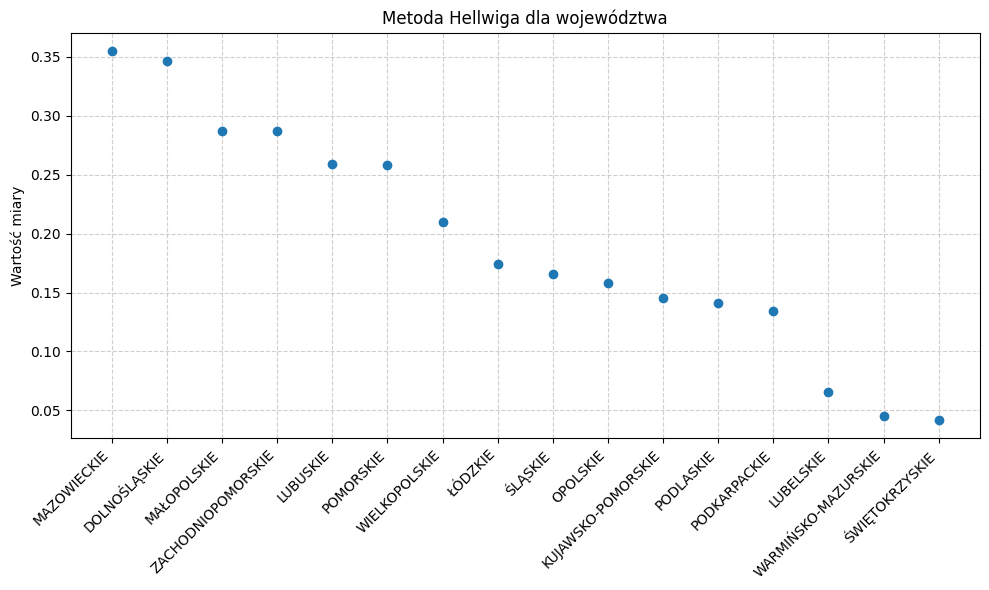

In [16]:
wojewodztwa_hellwig = wojewodztwa.copy()
wojewodztwa_hellwig = zamiana_destymulanty(wojewodztwa_hellwig, nominanty_woj, destymulanty_woj)
wojewodztwa_hellwig = standaryzacja(wojewodztwa_hellwig)

cechy_numeryczne = wojewodztwa_hellwig.select_dtypes(include="number").columns
wzorzec = wojewodztwa_hellwig[cechy_numeryczne].max()

odleglosci = []
for i in range(len(wojewodztwa_hellwig)):
    odleglosc = np.sqrt(sum((wojewodztwa_hellwig.loc[i, cechy_numeryczne] - wzorzec)**2))
    odleglosci.append(odleglosc)

wojewodztwa_hellwig['odleglosc_od_wzorca'] = odleglosci

# TMR
d0 = np.mean(odleglosci) + 2 * np.std(odleglosci)
wojewodztwa_hellwig['TMR'] = 1 - (wojewodztwa_hellwig['odleglosc_od_wzorca'] / d0)

posortowane_hellwig = wojewodztwa_hellwig[['wojewodztwo', 'TMR']].sort_values(
    by='TMR', ascending=False).reset_index(drop=True)

print("\n=== RANKING - METODA HELLWIGA (TMR) ===")
print(posortowane_hellwig)


X = range(len(posortowane_hellwig))
Y = posortowane_hellwig['TMR'].values
labels = posortowane_hellwig['wojewodztwo']
stworz_wykres(X, Y, labels, "województwa", "Wartość miary", "Metoda Hellwiga")

